In [1]:
import pandas as pd
import sweetviz 

In [2]:
df= pd.read_csv("data/transfusion.data")

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.describe()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [5]:
df1 = df.rename(columns={"Recency (months)":"recent",
                         "Frequency (times)":"total_frequency",
                         "Time (months)":"total_times",
                         "Monetary (c.c. blood)": "donation_cc",
                         "whether he/she donated blood in March 2007":"prediction"})

In [6]:
df1

,recent,total_frequency,donation_cc,total_times,prediction
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [7]:
analyse_report= sweetviz.analyze(df1,target_feat='prediction')

                                             |                                              | [  0%]   00:00 -…

/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-pa


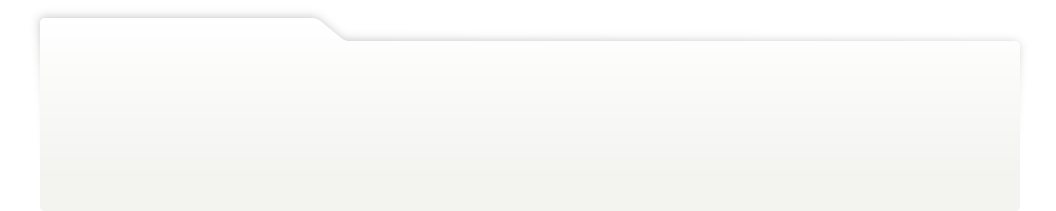
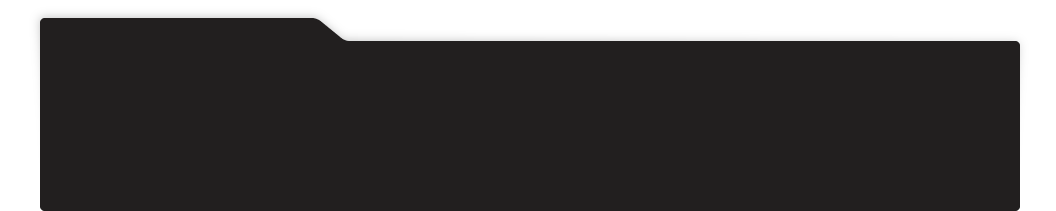
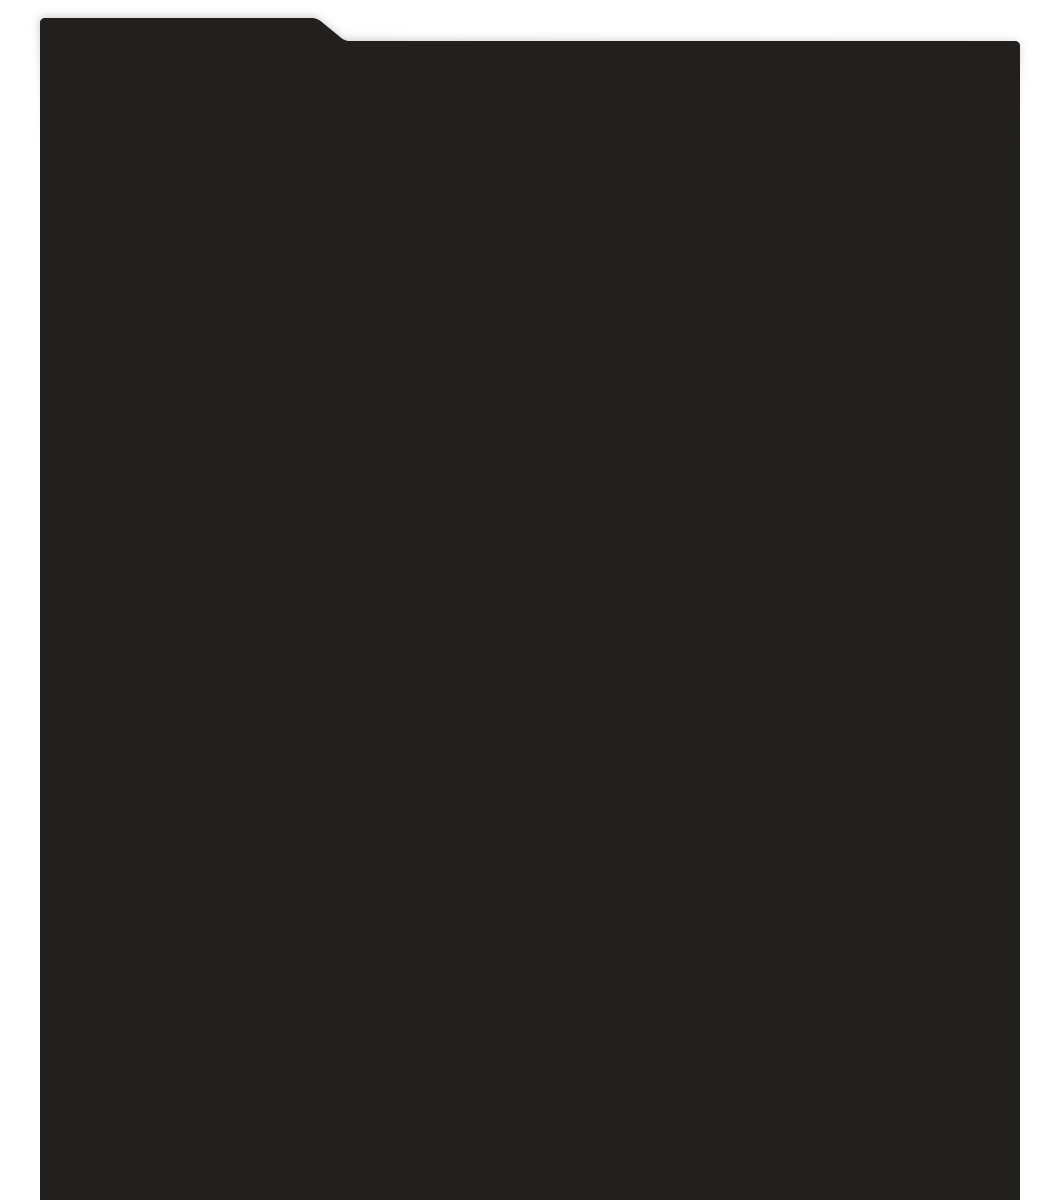
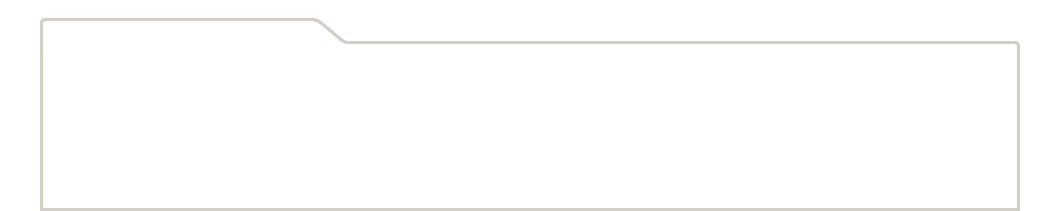
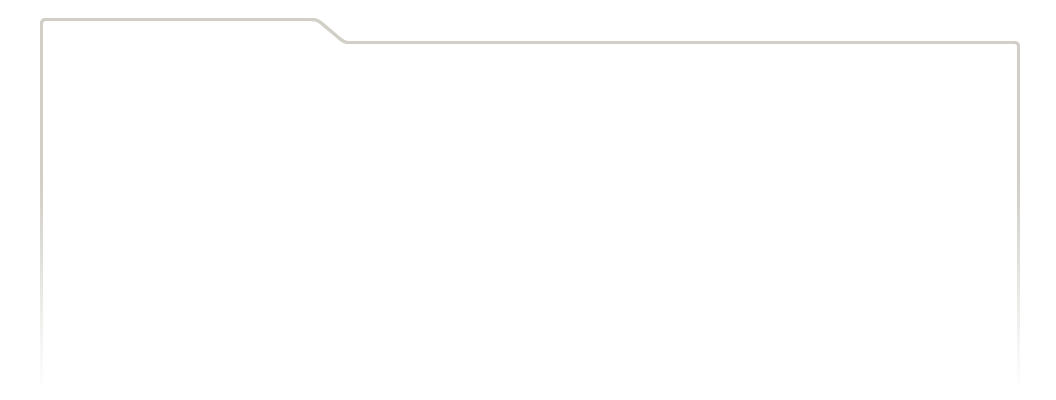
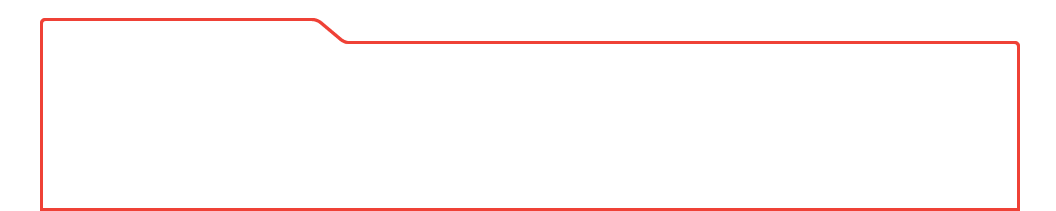
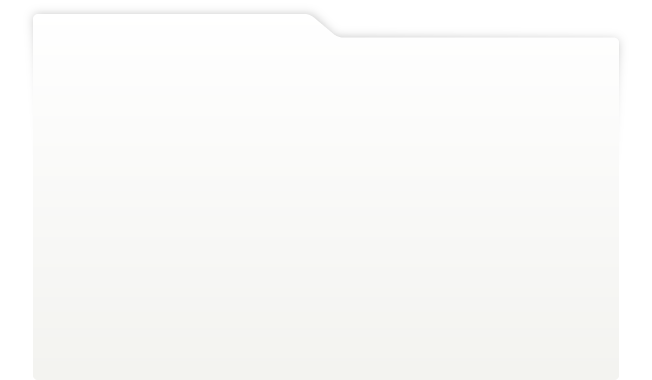
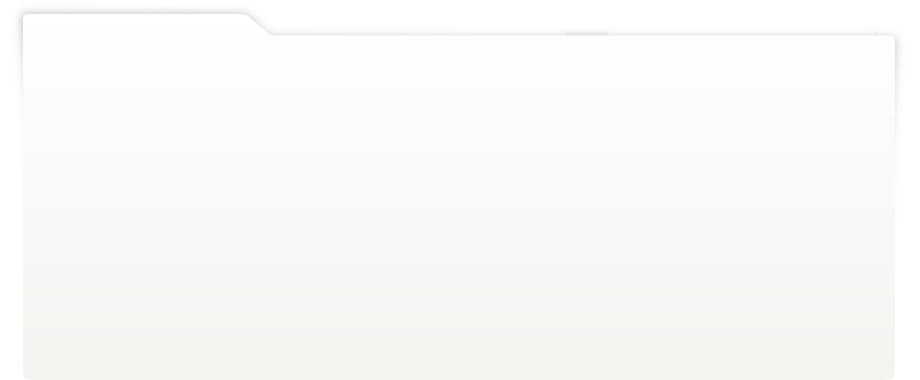
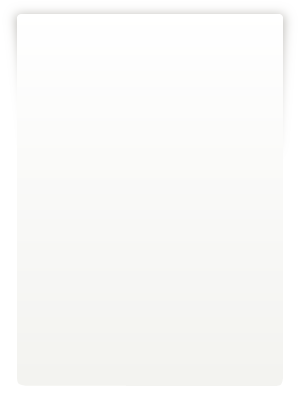
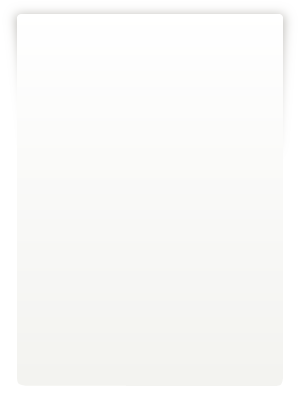
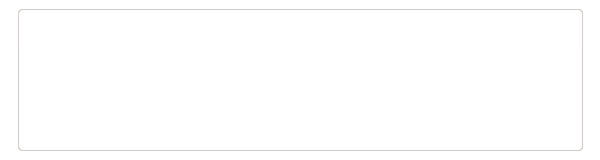
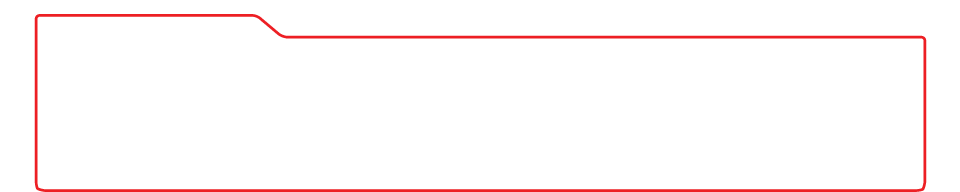
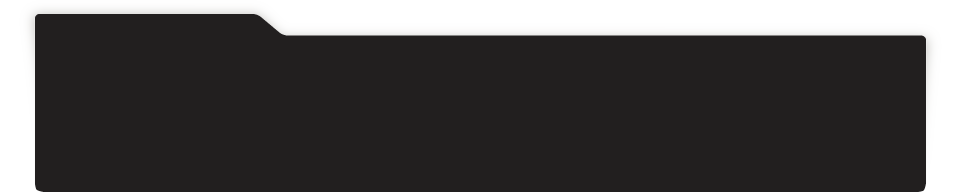
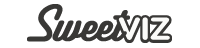
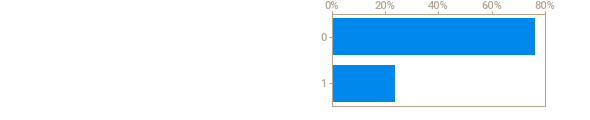
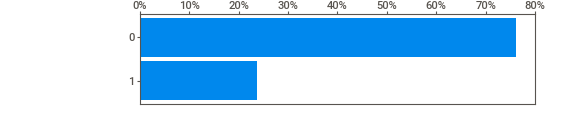
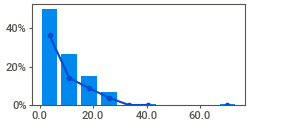
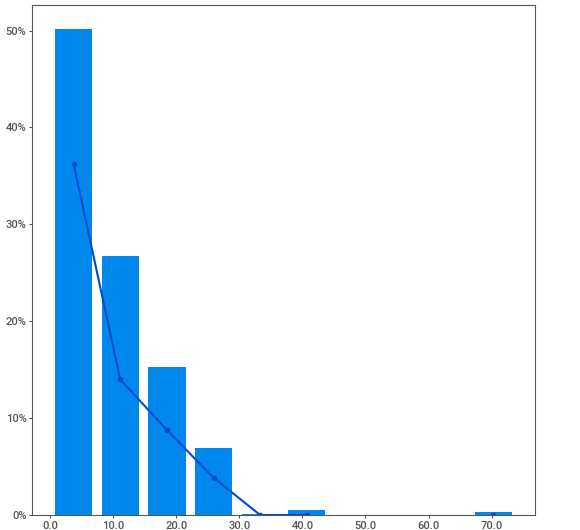
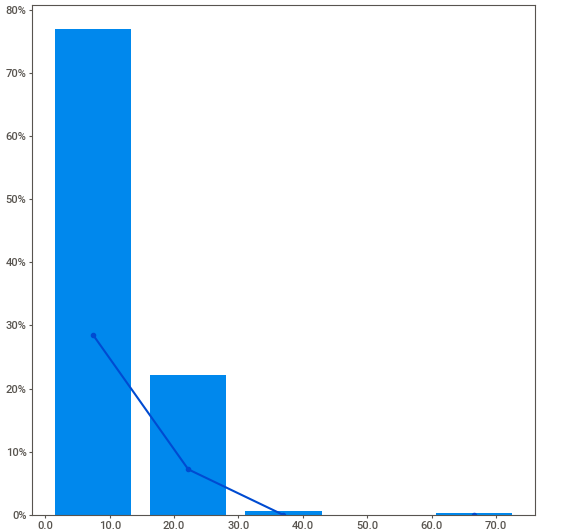
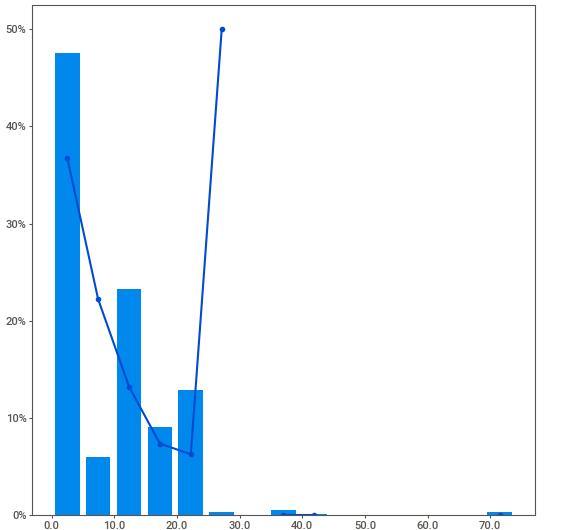
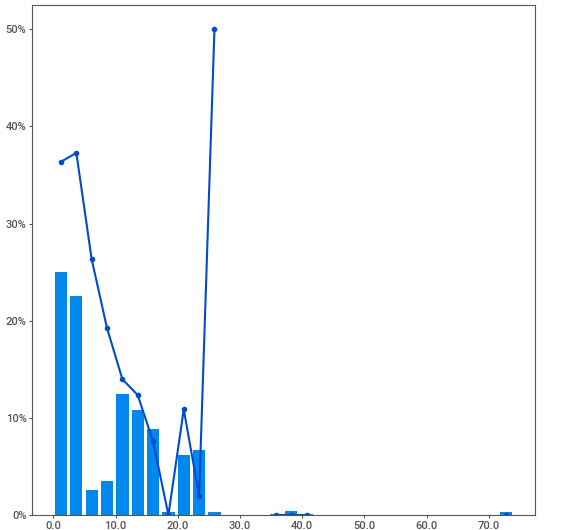
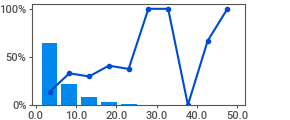
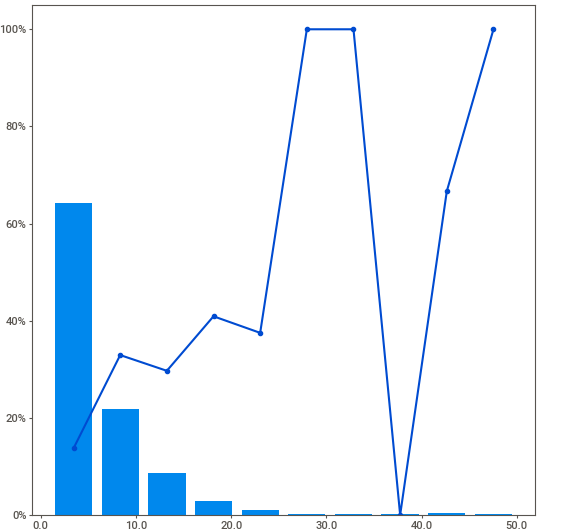
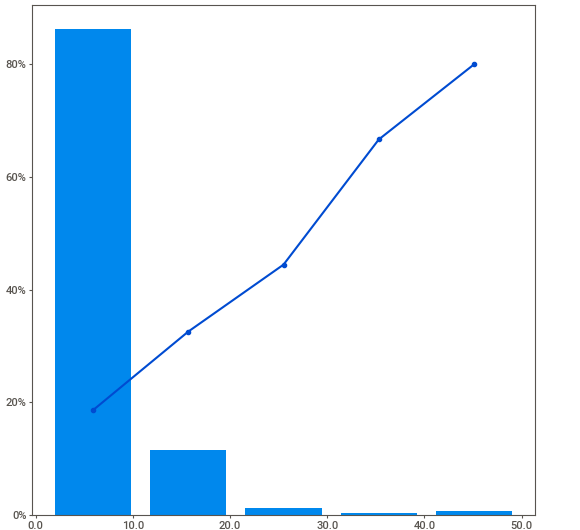
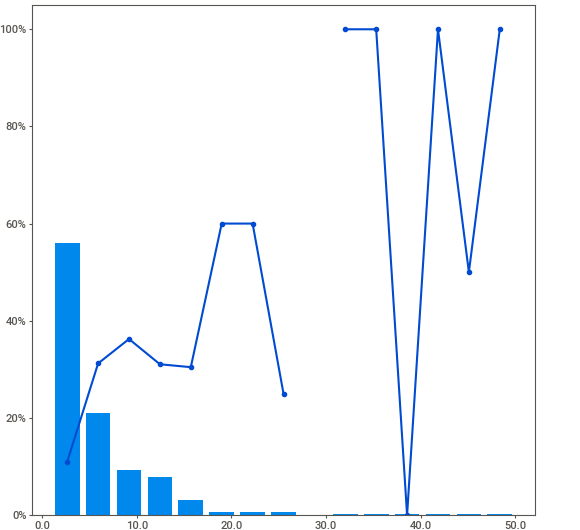
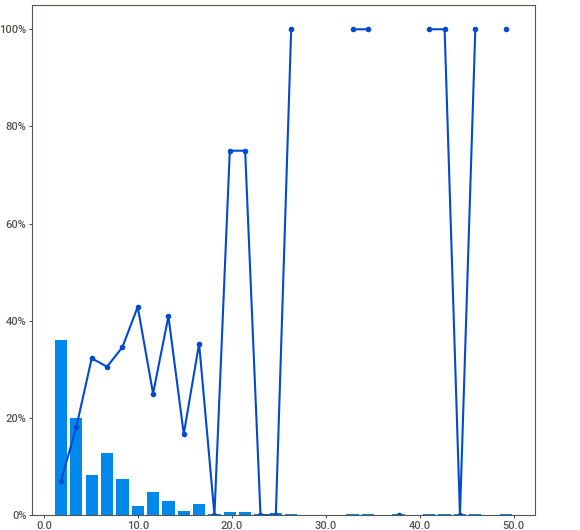
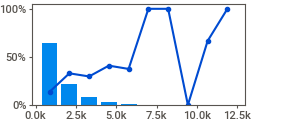
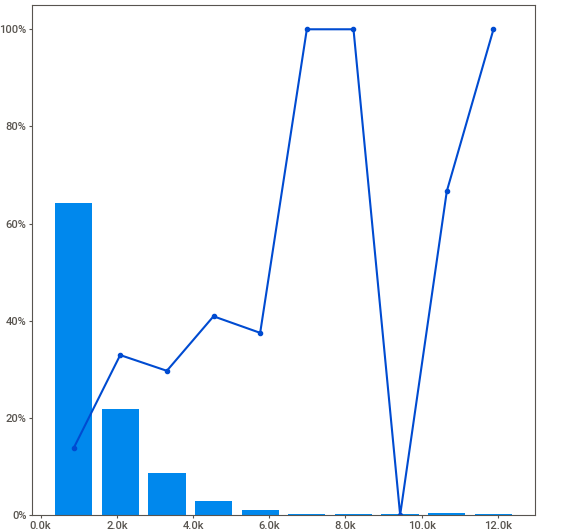
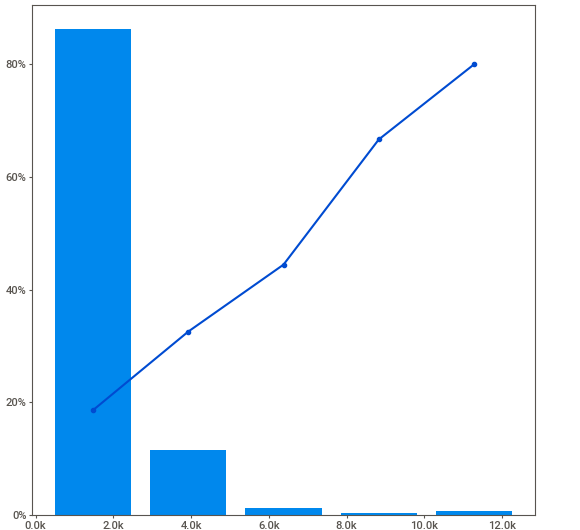
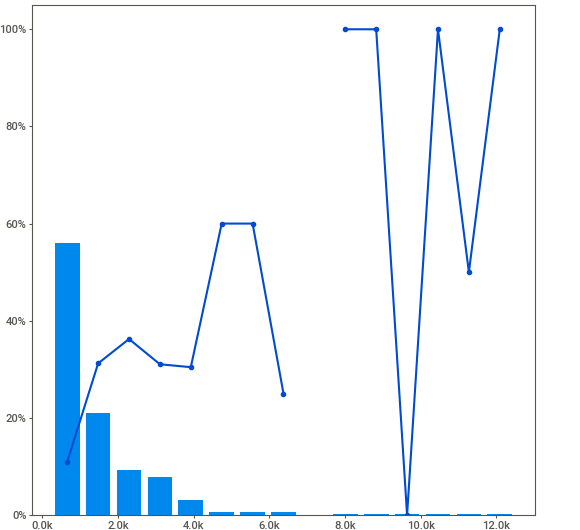
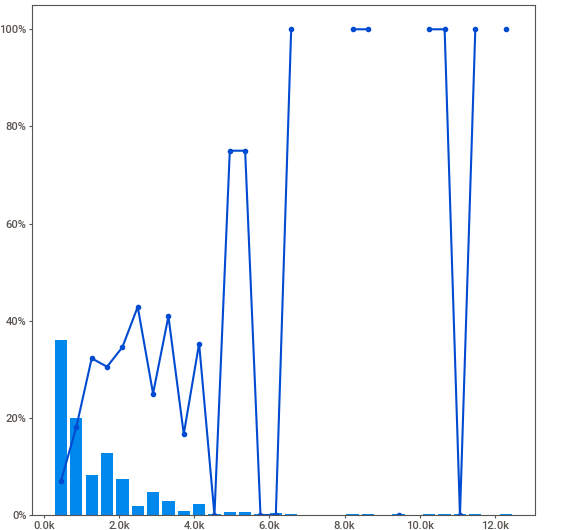
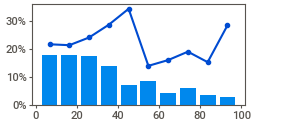
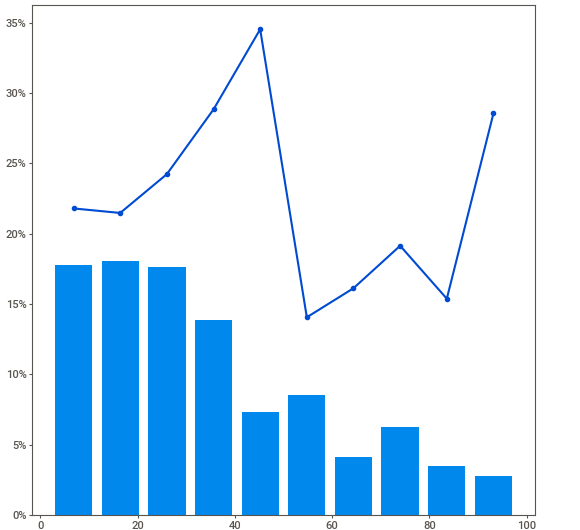
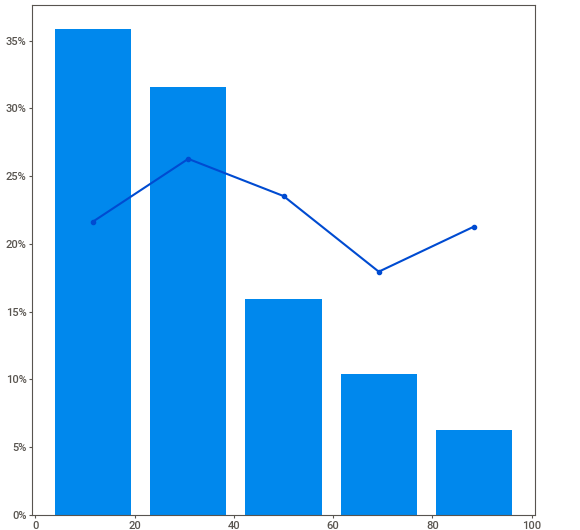
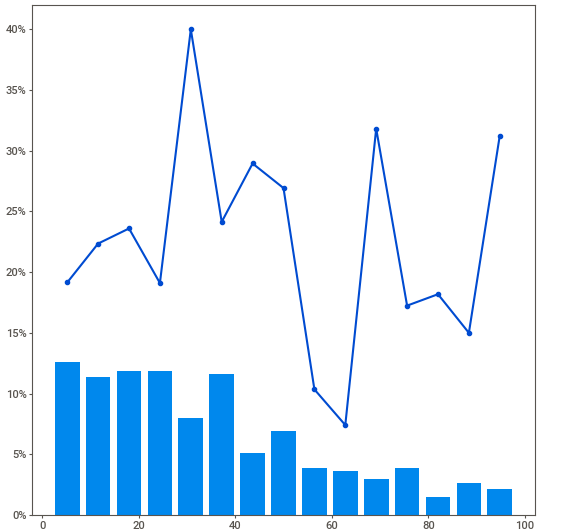
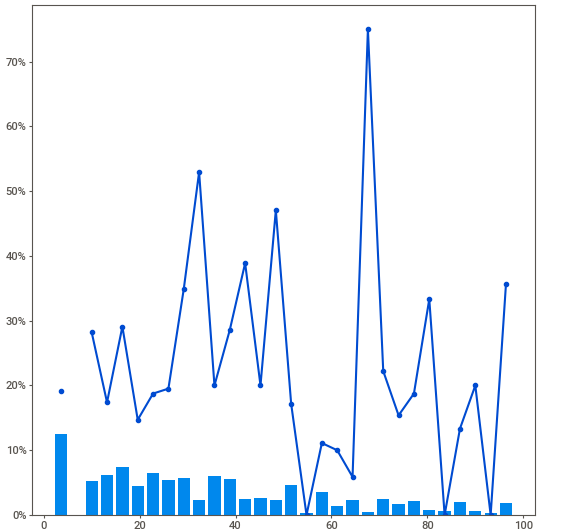
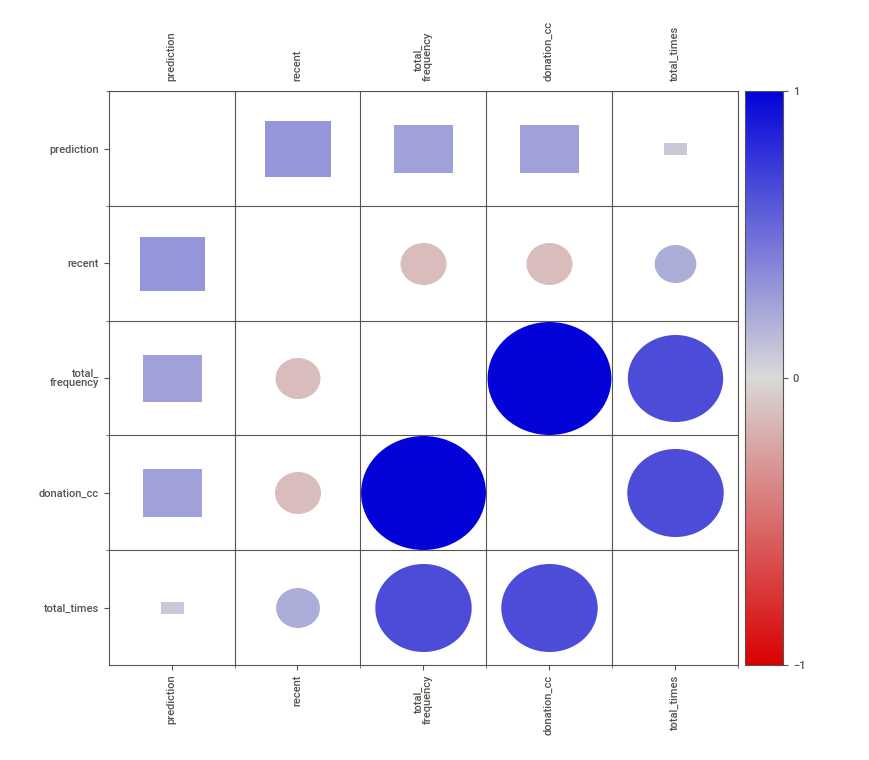
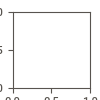

In [8]:
analyse_report.show_notebook()

In [9]:
!pip list | grep "tpot"

In [10]:
!pip install  deap update_checker tqdm stopit xgboost scikit-mdr skrebate tpot

In [11]:
!pip list | grep "scikit-learn"

scikit-learn          1.0.2


## Test Train Split

In [12]:
X=df1.drop(columns="prediction")
Y=df1.prediction

In [13]:
X

,recent,total_frequency,donation_cc,total_times
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape,Y_train.shape,X_test.shape,X_test.shape

((598, 4), (598,), (150, 4), (150, 4))

In [15]:
X_train.columns

Index(['recent', 'total_frequency', 'donation_cc', 'total_times'], dtype='object')

In [16]:
X_train['target'] = Y_train
X_test['target'] = Y_test

In [17]:
compare_report= sweetviz.compare([X_train,'xtrain'],[X_test,'xtest'], target_feat='target')

                                             |                                              | [  0%]   00:00 -…

/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-pa


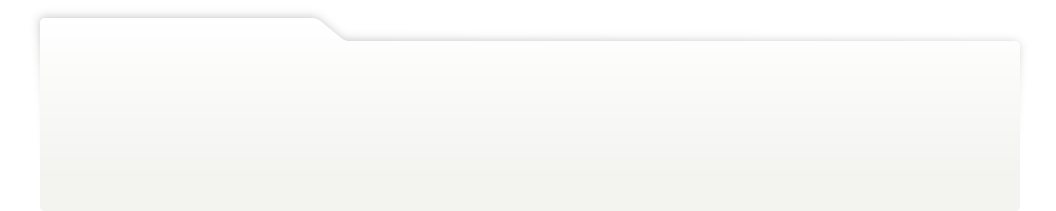
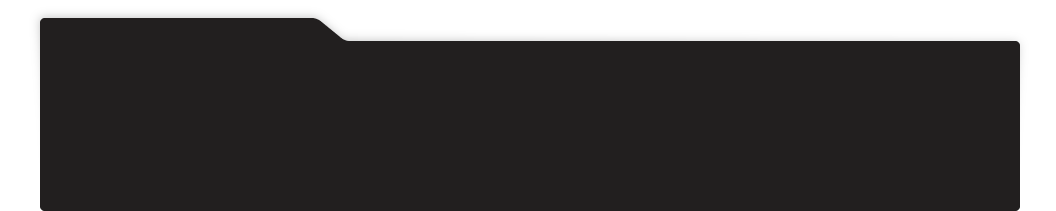
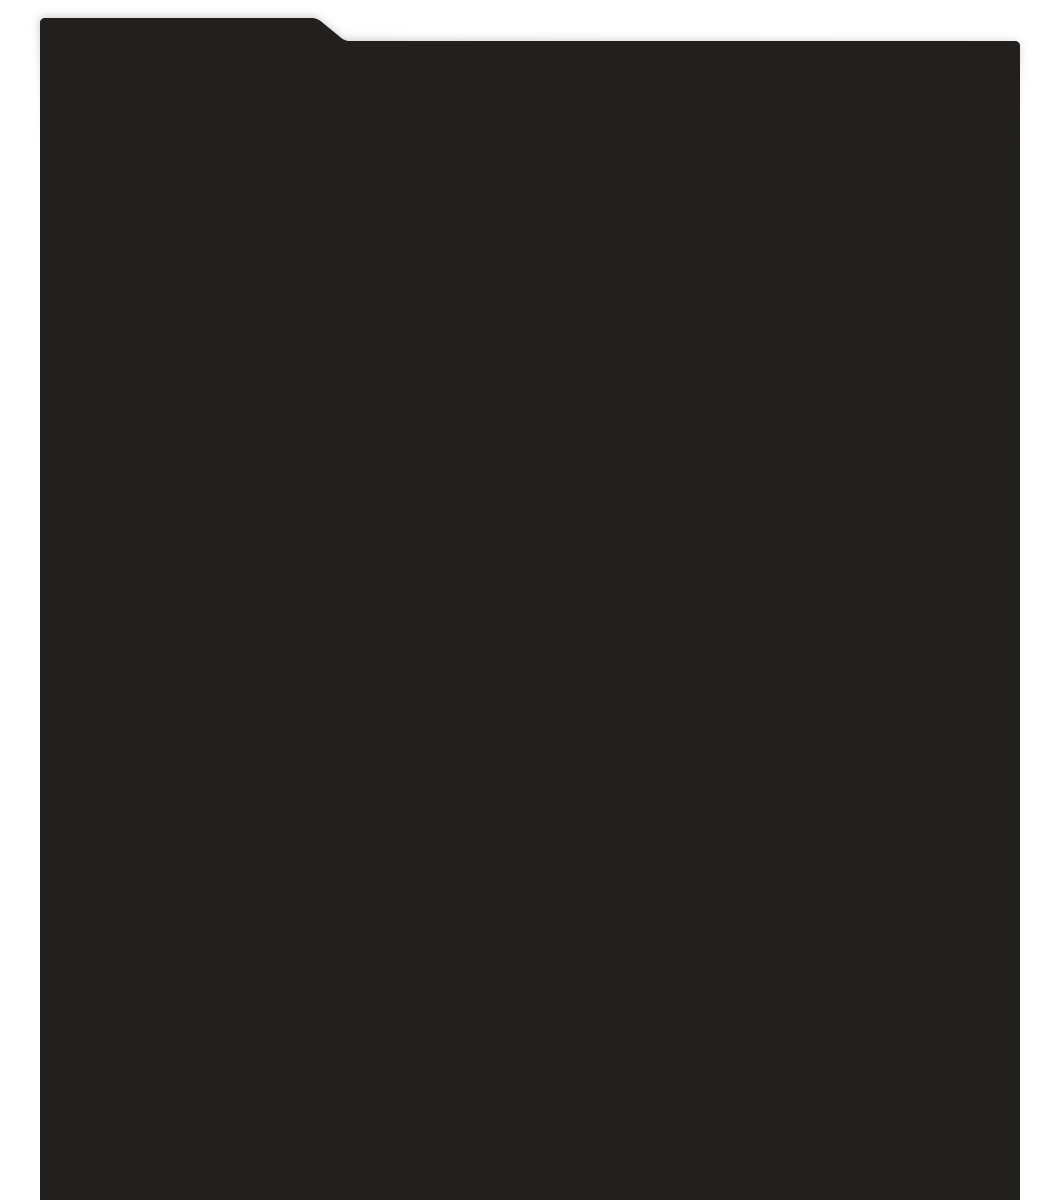
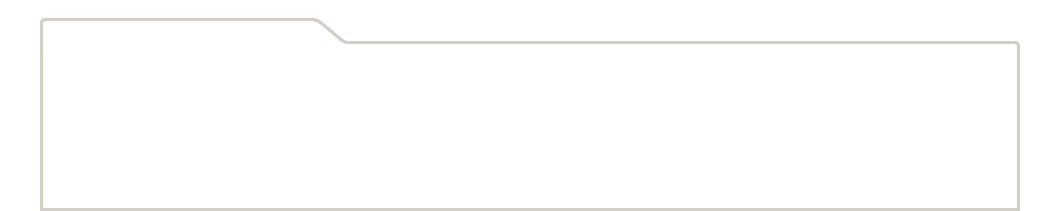
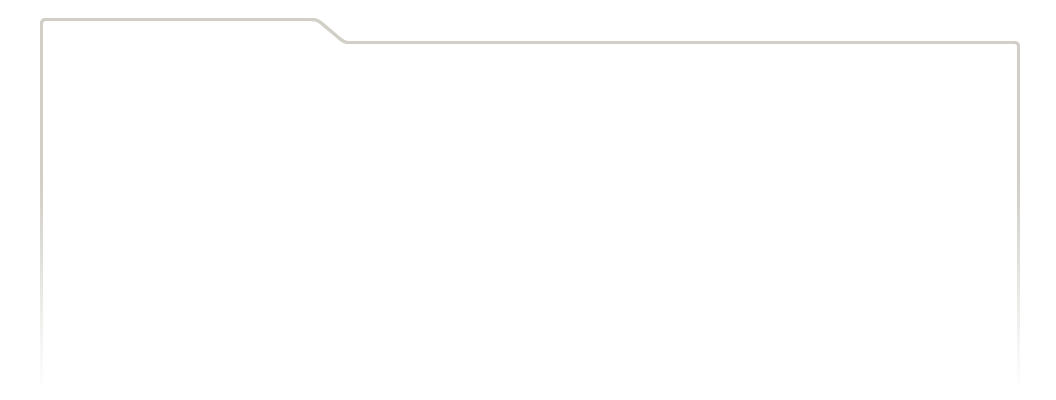
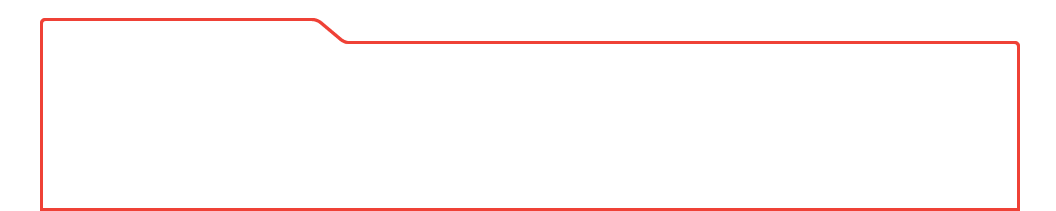
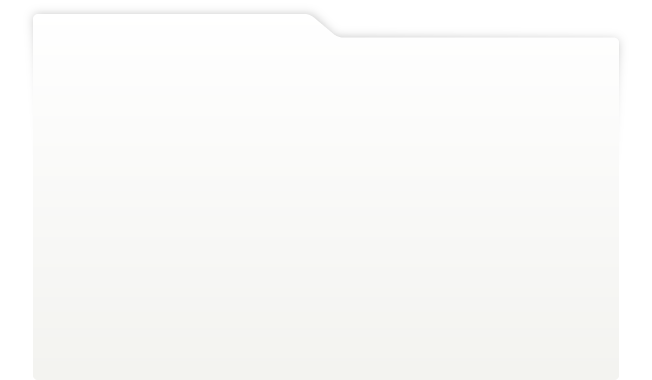
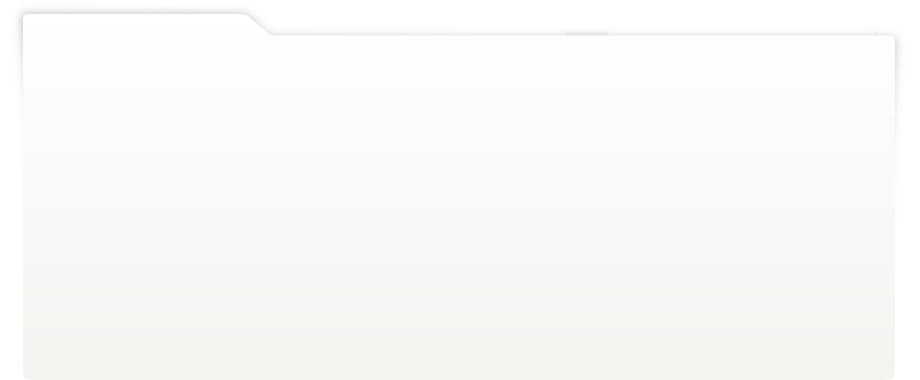
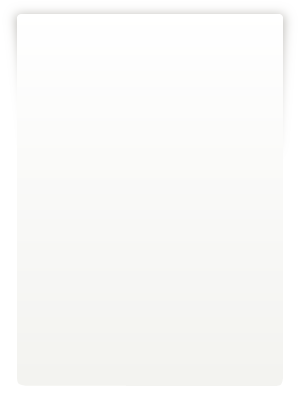
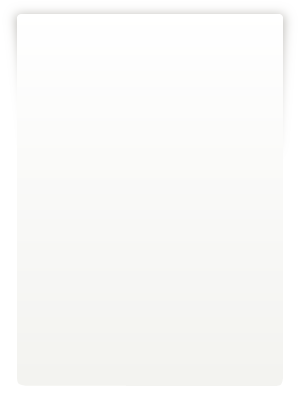
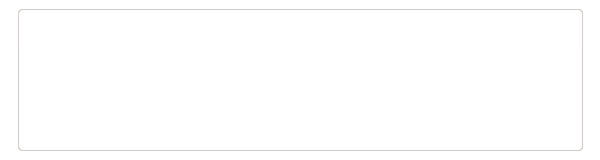
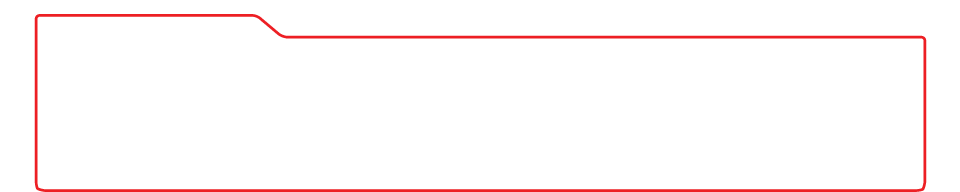
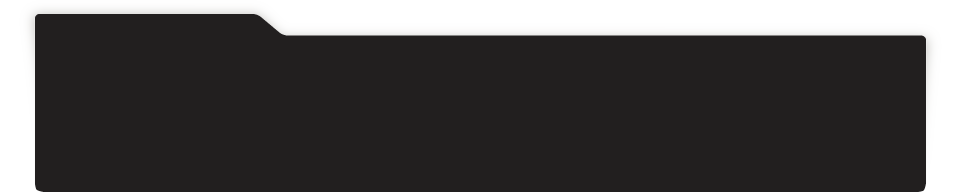
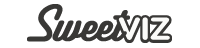
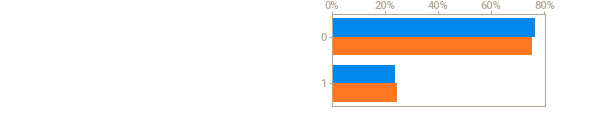
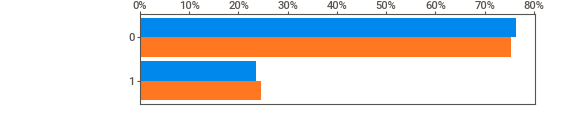
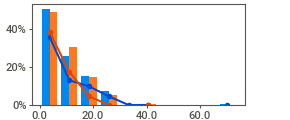
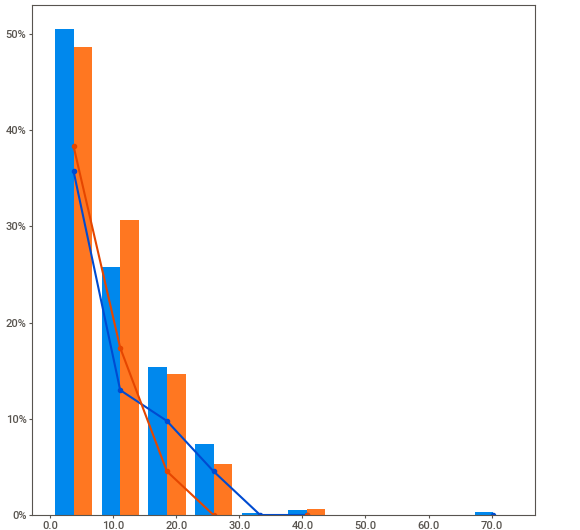
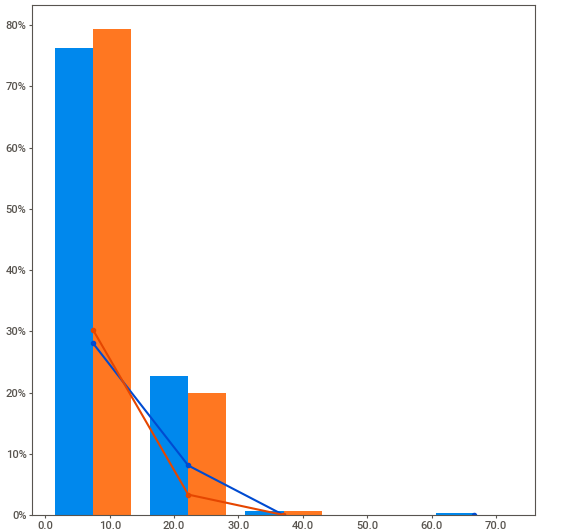
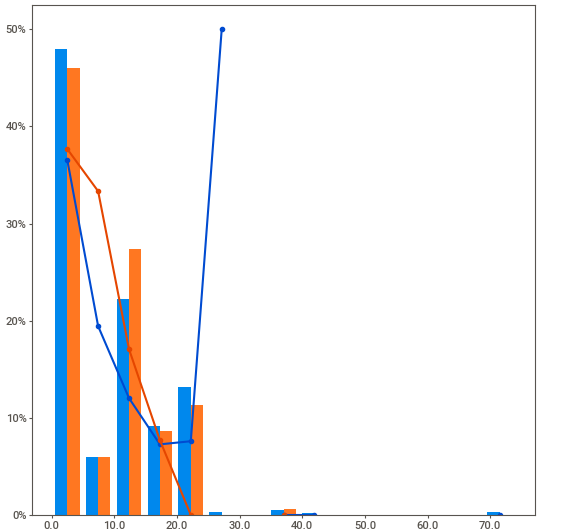
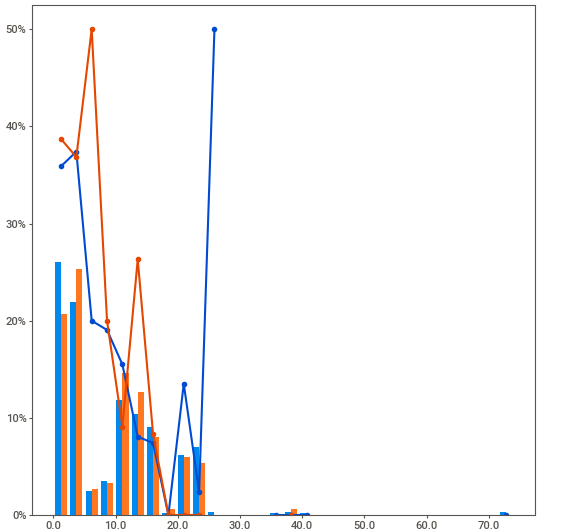
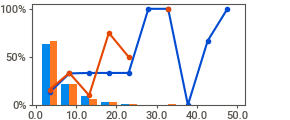
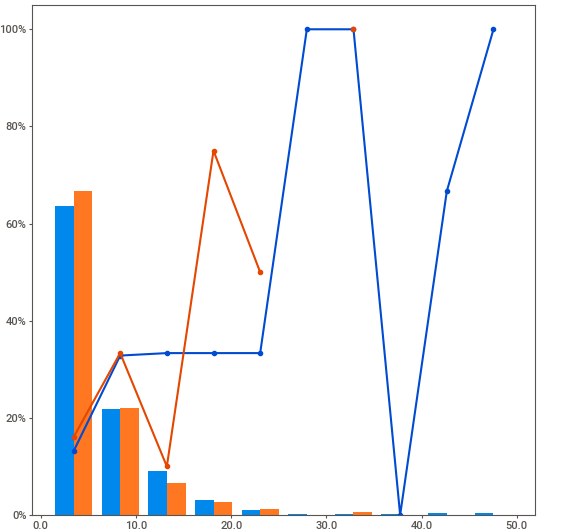
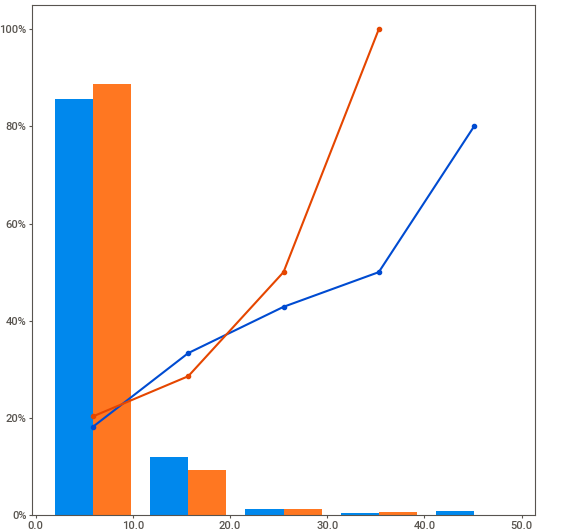
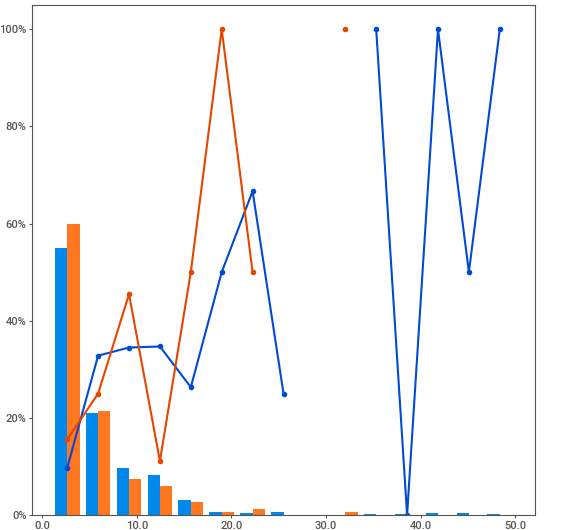
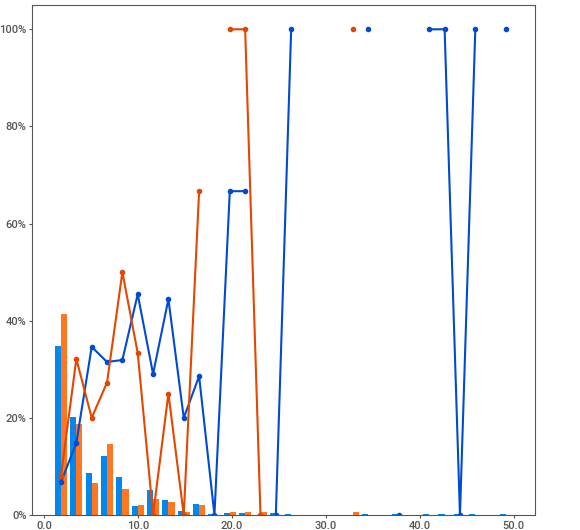
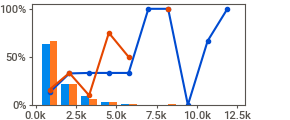
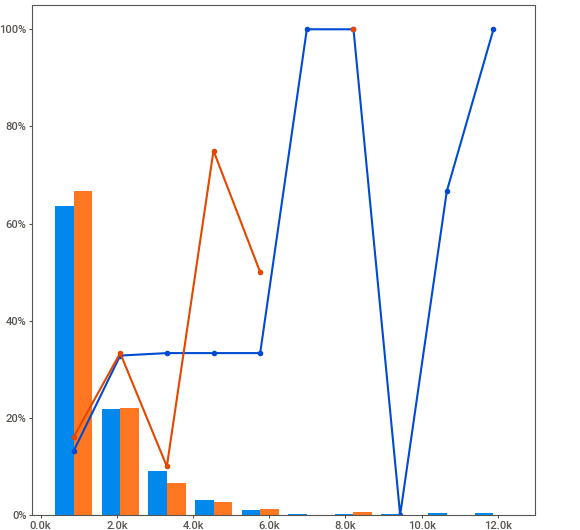
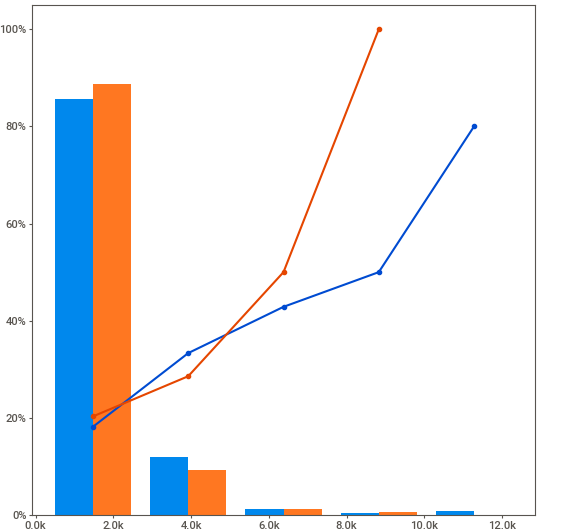
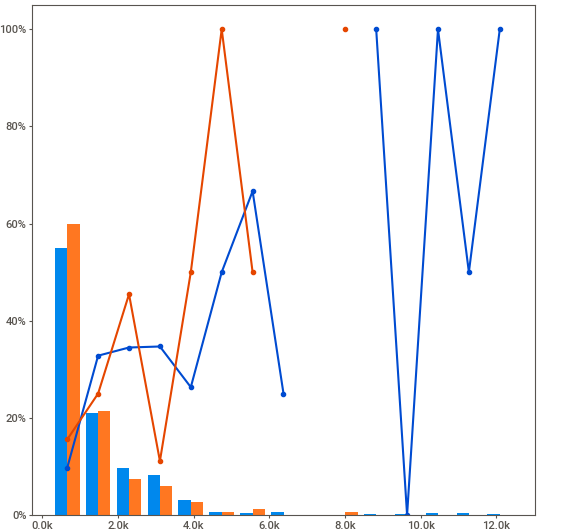
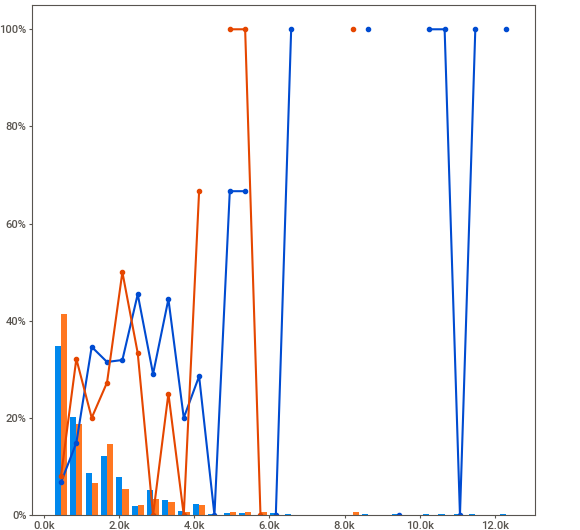
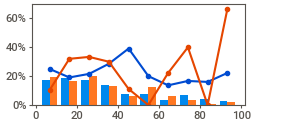
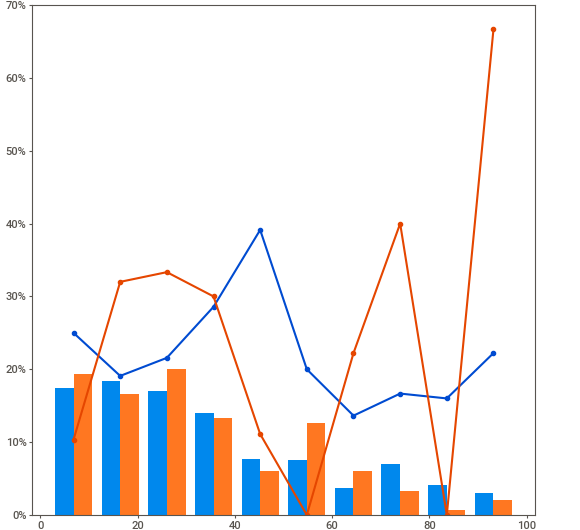
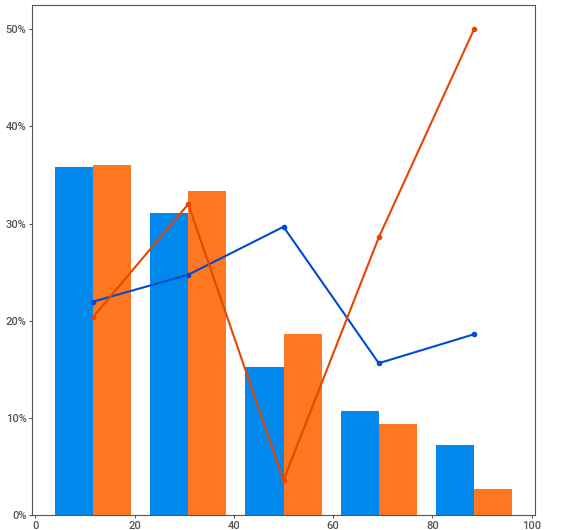
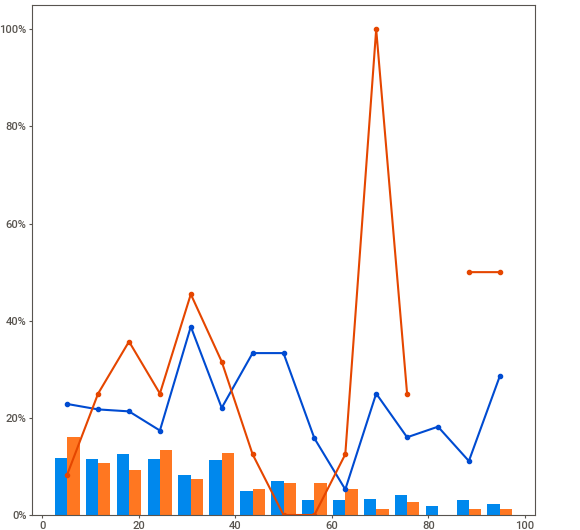
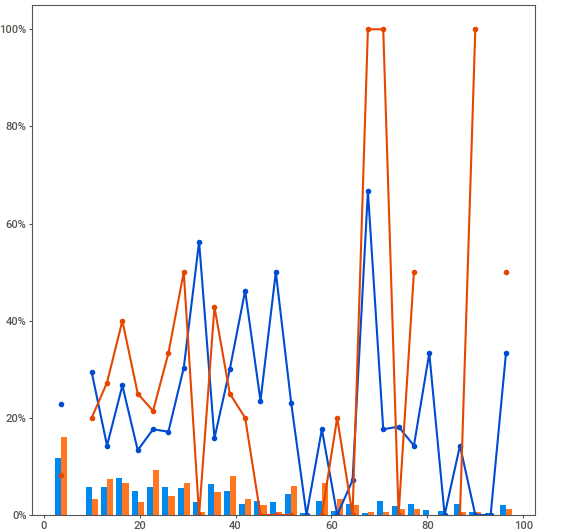
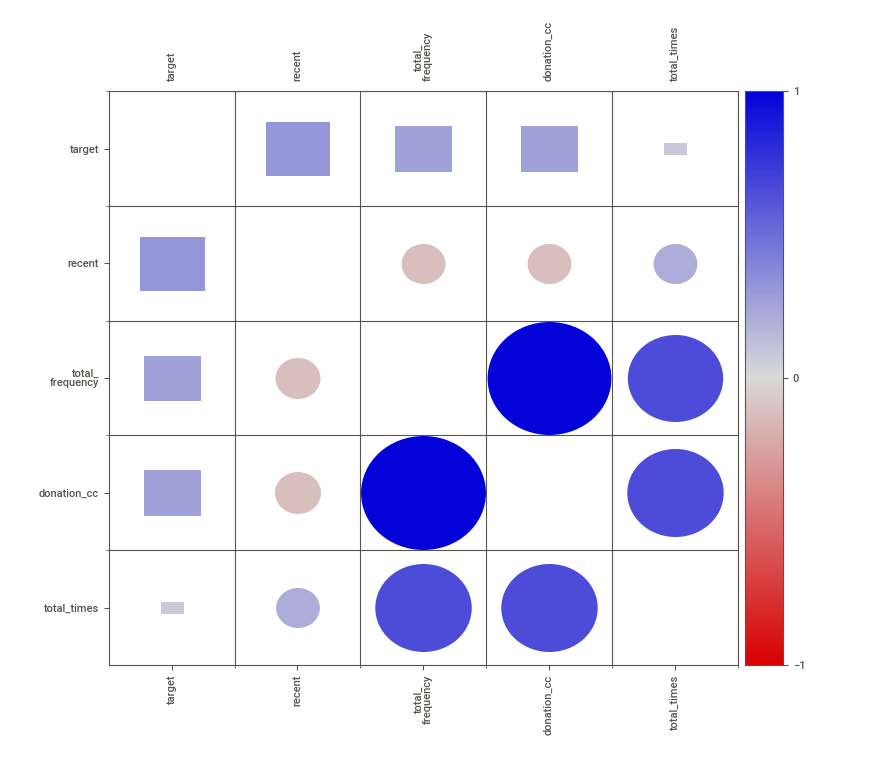
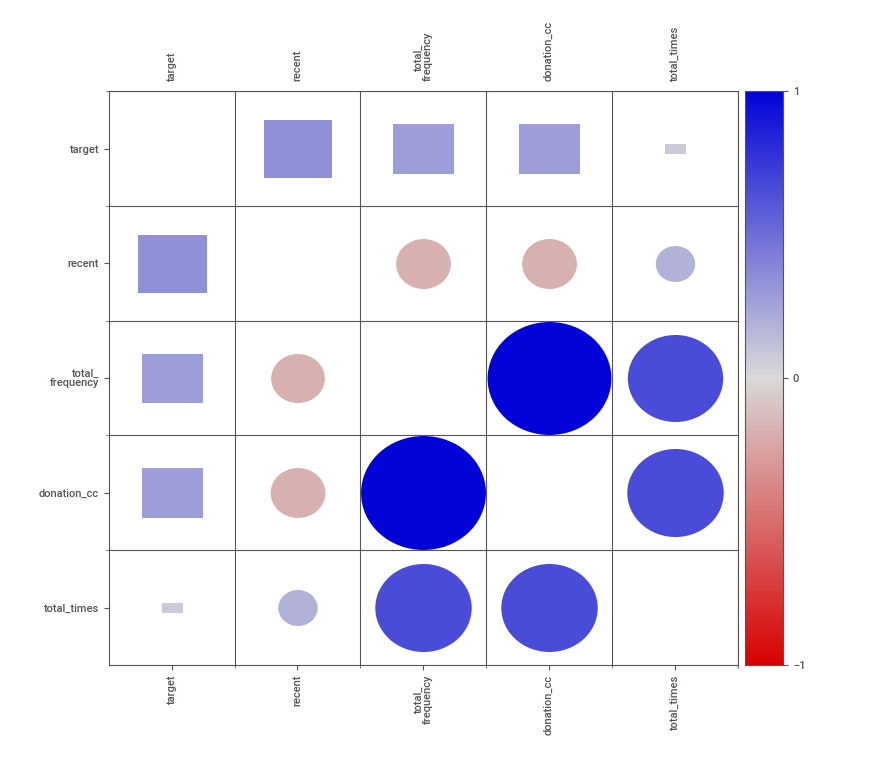

In [18]:
compare_report.show_notebook()

In [19]:
# Dropping target column post analysis of train and test dataset
X_train = X_train.drop(columns='target')
X_test = X_test.drop(columns='target')

In [20]:
# Verify the columsn
# Ensure there is no target column or alias target column in final X_train or X-test df
print(X_train.columns)
print(X_test.columns)

Index(['recent', 'total_frequency', 'donation_cc', 'total_times'], dtype='object')
Index(['recent', 'total_frequency', 'donation_cc', 'total_times'], dtype='object')


In [21]:
# Import TPOTClassifier and roc_auc_score
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=20,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, Y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(Y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/420 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7442006135864564

Generation 2 - Current best internal CV score: 0.7442006135864564

Generation 3 - Current best internal CV score: 0.7484106651540792

Generation 4 - Current best internal CV score: 0.7484106651540792

Generation 5 - Current best internal CV score: 0.7484106651540792

Generation 6 - Current best internal CV score: 0.7484106651540792

Generation 7 - Current best internal CV score: 0.7484106651540792

Generation 8 - Current best internal CV score: 0.7484106651540792

Generation 9 - Current best internal CV score: 0.7484106651540792

Generation 10 - Current best internal CV score: 0.7484106651540792

Generation 11 - Current best internal CV score: 0.7535515699763933

Generation 12 - Current best internal CV score: 0.7583138081665604

Generation 13 - Current best internal CV score: 0.7583138081665604

Generation 14 - Current best internal CV score: 0.7604073159652512

Generation 15 - Current best internal CV score: 0.760407

/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/home/nandanr/.pyenv/versions/3.8.12/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [22]:
X_train.var().round(2)

recent                  69.39
total_frequency         36.44
donation_cc        2277636.09
total_times            617.51
dtype: float64

# donation has high varience compared to other features so it will affect the models ability to learn from other features 
# to correct varience problems we use normalisation 

# log normalization

In [23]:
# If a feature in our dataset has a high variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.

# Correcting for high variance is called normalization
# Import numpy
import numpy as np

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'donation_cc'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed
X_train_normed.var().round(3)

recent              69.391
total_frequency     36.442
total_times        617.514
monetary_log         0.843
dtype: float64

In [24]:
X_train_normed.var().round(2)

recent              69.39
total_frequency     36.44
total_times        617.51
monetary_log         0.84
dtype: float64

In [25]:
# Importing modules
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear',random_state=42)

# Train the model
logreg.fit(X_train_normed, Y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(Y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7651


In [26]:
# # If a feature in our dataset has a high variance that's an order of magnitude or more greater than the other features, this could impact the model's ability to learn from other features in the dataset.

# # Correcting for high variance is called normalization
# # Import numpy
# import numpy as np

# # Copy X_train and X_test into X_train_normed and X_test_normed
# X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# # Specify which column to normalize
# col_to_normalize = ['donation_cc','total_times']



# # Log normalization
# for df_ in [X_train_normed, X_test_normed]:
#     for col_ in col_to_normalize:
#         print(f"Normalizing col: {col_}")
#         # Add log normalized column
#         df_[f'{col_}_normalized'] = np.log(df_[col_])
#         # Drop the original column
#         df_.drop(columns=col_, inplace=True)

# # # Check the variance for X_train_normed
# X_train_normed.var().round(3)

In [27]:
# Importing modules
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(solver='liblinear',random_state=42)

# Train the model
logreg.fit(X_train_normed, Y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(Y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7651
